<a href="https://colab.research.google.com/github/CyberMaryVer/detectron-doc/blob/master/Tutorial_mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [1]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 90kB/s 


# Inference for image

In [2]:
from google.colab import files

uploaded = files.upload()

Saving example.jpg to example.jpg


example.jpg


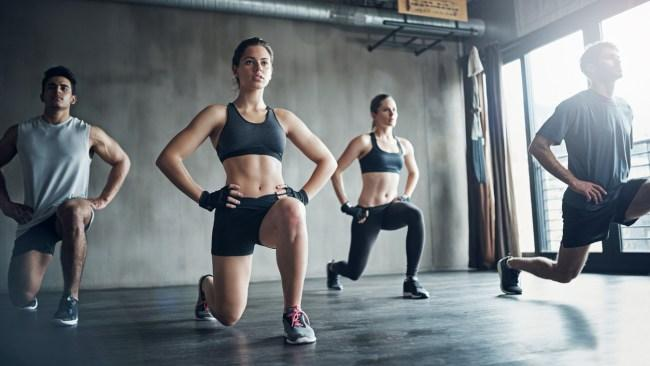

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [4]:
import mediapipe as mp
mp_pose = mp.solutions.pose

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and possibly unrelated

In [ ]:
mp_pose.Pose.__dict__

mappingproxy({'__doc__': 'MediaPipe Pose.\n\n  MediaPipe Pose processes an RGB image and returns pose landmarks on the most\n  prominent person detected.\n\n  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for\n  usage examples.\n  ',
              '__init__': <function mediapipe.python.solutions.pose.Pose.__init__>,
              '__module__': 'mediapipe.python.solutions.pose',
              'process': <function mediapipe.python.solutions.pose.Pose.process>})

In [7]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec1 = mp_drawing.DrawingSpec(thickness=2, circle_radius=4, color=(255,255,255))
drawing_spec2 = mp_drawing.DrawingSpec(thickness=1, circle_radius=4, color=(0,255,0))

Nose coordinates: (255.19464910030365, 69.64714497327805)
Pose landmarks of example.jpg:


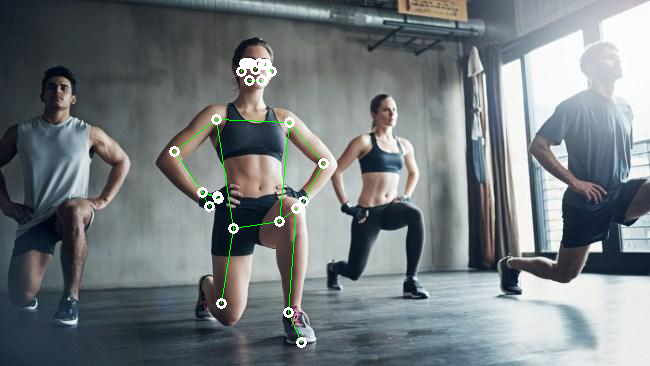

In [8]:
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec1,
        connection_drawing_spec=drawing_spec2)
    cv2_imshow(annotated_image)

# Video

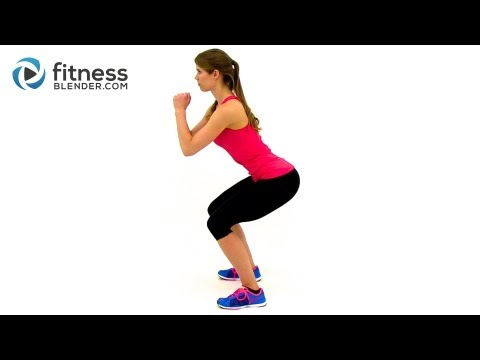

In [9]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("mGvzVjuY8SY", width=500)
display(video)

In [10]:
!pip install youtube-dl
!pip install ffmpeg
!youtube-dl https://www.youtube.com/watch?v=mGvzVjuY8SY -f 22 -o video_.mp4
!mkdir test
!ffmpeg -i video_.mp4 -ss 00:00:47 -t 15 -c:v copy video.mp4
!rm video_.mp4

     |████████████████████████████████| 1.9MB 4.3MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=a285c1f4b43e5d043f4ea20a444539193f8010c270d288068538903b88775f98
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg
[youtube] mGvzVjuY8SY: Downloading webpage
[download] Destination: video_.mp4
[download] 100% of 29.63MiB in 00:00
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribid

In [11]:
!mkdir imgs
!ffmpeg -i video.mp4 -r 4/1 imgs/frame%03d.jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [12]:
import os
images = {name: cv2.imread("imgs/"+name) for name in os.listdir("imgs")}
images.keys()

dict_keys(['frame042.jpg', 'frame048.jpg', 'frame041.jpg', 'frame046.jpg', 'frame019.jpg', 'frame017.jpg', 'frame023.jpg', 'frame062.jpg', 'frame061.jpg', 'frame050.jpg', 'frame026.jpg', 'frame055.jpg', 'frame006.jpg', 'frame060.jpg', 'frame001.jpg', 'frame034.jpg', 'frame008.jpg', 'frame051.jpg', 'frame014.jpg', 'frame030.jpg', 'frame028.jpg', 'frame012.jpg', 'frame018.jpg', 'frame025.jpg', 'frame040.jpg', 'frame022.jpg', 'frame054.jpg', 'frame058.jpg', 'frame044.jpg', 'frame021.jpg', 'frame009.jpg', 'frame045.jpg', 'frame052.jpg', 'frame011.jpg', 'frame013.jpg', 'frame037.jpg', 'frame010.jpg', 'frame053.jpg', 'frame016.jpg', 'frame024.jpg', 'frame049.jpg', 'frame057.jpg', 'frame004.jpg', 'frame005.jpg', 'frame056.jpg', 'frame033.jpg', 'frame003.jpg', 'frame039.jpg', 'frame027.jpg', 'frame043.jpg', 'frame035.jpg', 'frame029.jpg', 'frame020.jpg', 'frame036.jpg', 'frame002.jpg', 'frame015.jpg', 'frame031.jpg', 'frame059.jpg', 'frame032.jpg', 'frame007.jpg', 'frame038.jpg', 'frame047.jpg

In [13]:
!mkdir res

In [14]:
# !rm -r res/
# !mkdir res
# !rm out.mp4
from tqdm.notebook import tqdm

with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
  for name, image in tqdm(images.items()):
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    # print(
    #   f'Nose coordinates: ('
    #   f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    #   f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    # )

    # Draw pose landmarks.
    # print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec1,
        connection_drawing_spec=drawing_spec2)
    # cv2_imshow(annotated_image)

    # Save frame
    cv2.imwrite(f"res/{name}", annotated_image)

rm: cannot remove 'out.mp4': No such file or directory


In [15]:
!ffmpeg -framerate 5 -pattern_type glob -i '/content/res/frame*.jpg' \
-c:v libx264 -vf fps=5 -pix_fmt yuv420p out.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [16]:
from IPython.display import HTML
from base64 import b64encode

# Input video path
save_path = "/content/out.mp4"
# Compressed video path
compressed_path = "/content/out_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)